In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [66]:
cookies = pd.read_csv("../Dataset/cookies.csv")
cookies_validate = pd.read_csv("../Dataset/cookies_validate.csv")

In [67]:
cookies.dropna(inplace=True)
cookies.drop(['diameter', 'crunch factor', 'pH', 'density'], axis=1, inplace=True)

In [68]:
cookies['butter type'].value_counts()

melted    3908
cubed     1273
Name: butter type, dtype: int64

In [69]:
cookies['mixins'].value_counts()

chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [82]:
cookies["mixins"] = cookies["mixins"].str.replace("nuts,raisins", "nuts, raisins")

In [70]:
"""
pd.get_dummies(cookies['butter type'], prefix='butter type')
cookies = pd.concat([cookies,pd.get_dummies(cookies['butter type'], prefix='butter type')],axis=1)
cookies.drop(['butter type'],axis=1, inplace=True)
"""

"\npd.get_dummies(cookies['butter type'], prefix='butter type')\ncookies = pd.concat([cookies,pd.get_dummies(cookies['butter type'], prefix='butter type')],axis=1)\ncookies.drop(['butter type'],axis=1, inplace=True)\n"

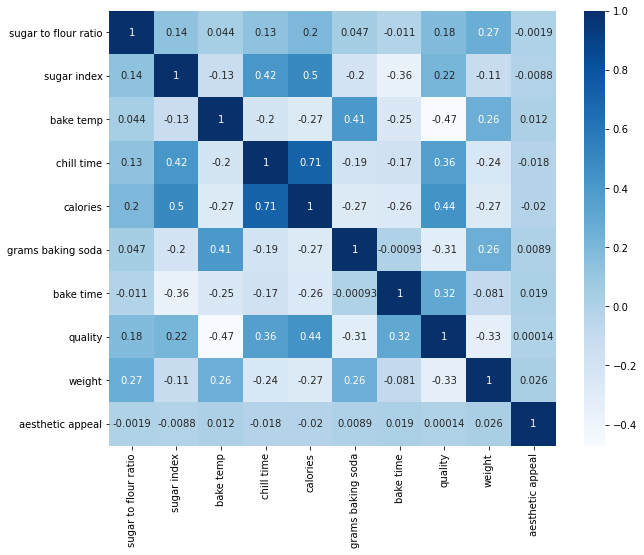

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(cookies.corr(), annot=True, cmap='Blues')

In [72]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,butter type,weight,mixins,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.44,12.1,8,melted,15.2,raisins,3
1,0.23,3.3,520,34.0,113.0,0.48,8.4,7,melted,12.4,raisins,3
2,0.18,1.9,360,33.0,106.0,0.83,14.0,9,melted,9.4,"nuts, chocolate",3
3,0.18,10.5,490,41.0,124.0,0.35,10.5,7,melted,12.2,chocolate,3
4,0.24,2.4,770,6.0,33.0,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",3


In [83]:
# define X and y (features and target)
X = cookies.drop(columns="quality")
y = cookies["quality"]

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Define columns to use
ordinal_cols = ["mixins"]
oneHot_cols = ["butter type"]
categ_cols = ordinal_cols + oneHot_cols
X_cat = X_train[categ_cols]

# Define categories order for ordinal columns
mixins = ["chocolate", "raisins", "chocolate, oats", "nuts, chocolate", "nuts, raisins", "nuts, oats, chocolate", "nuts, oats", "chocolate, peanut butter", "raisins, oats", "peanut butter", "oats", "chocolate, oats, peanut butter", "peanut butter, raisins"]
ord_cats = [mixins]


# Initialize transformers
ord_enc = OrdinalEncoder(categories=ord_cats)
oneH = OneHotEncoder(handle_unknown="ignore")

# Assemble the "Column Transformer"
categ_encode_pipeline = ColumnTransformer([
    ("ord_encoder_branch", ord_enc, ordinal_cols),
    ("oneH_encoder_branch", oneH, oneHot_cols)
])

In [86]:
# Fit & Transform to training set
X_cat = categ_encode_pipeline.fit_transform(X_cat)

In [87]:
X_cat

array([[0., 0., 1.],
       [3., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [3., 0., 1.],
       [0., 0., 1.]])

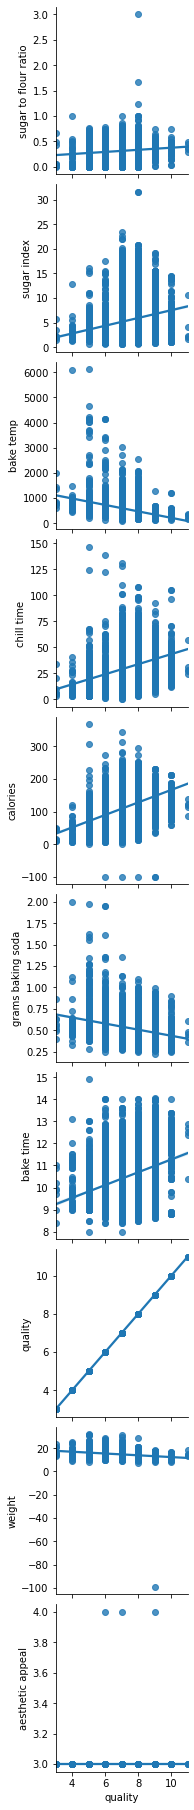

In [49]:
cookies_testing = cookies.select_dtypes(["float64", "int64"])
sns.pairplot(data=cookies_testing, y_vars=cookies_testing.columns, x_vars='quality', kind='reg')

In [11]:
cookies_validate.head()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,14,0.62,19.25,400.0,41.0,172.0,1.0002,7.98,0.67,9.7,0,melted,16.6,7,"nuts, chocolate",1.85,3
1,26,0.35,1.00,520.0,35.0,146.0,0.9930,8.45,0.44,10.0,0,melted,13.8,7,chocolate,1.43,3
2,30,0.39,10.40,440.0,20.0,142.0,0.9974,8.20,0.53,10.0,0,melted,17.0,7,chocolate,1.57,3
3,52,0.33,1.10,570.0,21.0,82.0,0.9910,8.32,0.46,10.9,0,melted,12.4,7,"chocolate, oats",1.44,3
4,100,0.37,13.50,600.0,52.0,192.0,0.9975,8.00,0.44,9.1,0,melted,14.8,7,chocolate,1.51,3


In [81]:
cookies_validate['mixins'].value_counts()

chocolate                         332
raisins                           198
chocolate, oats                   121
nuts, chocolate                    69
nuts,raisins                       28
nuts, oats, chocolate              17
nuts, oats                          6
raisins, oats                       3
chocolate, peanut butter            2
peanut butter                       2
chocolate, oats, peanut butter      1
Name: mixins, dtype: int64

In [88]:
cookies_validate["mixins"] = cookies_validate["mixins"].str.replace("nuts,raisins", "nuts, raisins")